In [1]:
# We'll be testing the trainer class here and fixing stuff wherever necessary

# added library folder to path for notebook
import sys  
sys.path.insert(0, './gray_lib')

In [2]:
# imported all contents
from gray_lib import *

In [3]:
# import other modules
from mnist import MNIST
import random
import matplotlib.pyplot as plt

In [4]:
# Load data
mndata = MNIST('samples')
mndata.gz = True

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [5]:
# Define a trainer instance
trainer = Trainer(x_train=train_images,y_train=train_labels,x_test=test_images,y_test=test_labels)

In [6]:
# create a model
trainer.create_model()

In [7]:
# compile model
trainer.compile_model()

('compiling model', <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001956DDFF240>)
('model compiled successfully',)


In [8]:
# train the model
trainer.train(epochs=5)

Train on 124800 samples
Epoch 1/5
124800/124800 - 12s - loss: 0.7541 - accuracy: 0.7706
Epoch 2/5
124800/124800 - 12s - loss: 0.4126 - accuracy: 0.8673
Epoch 3/5
124800/124800 - 11s - loss: 0.3393 - accuracy: 0.8892
Epoch 4/5
124800/124800 - 10s - loss: 0.2972 - accuracy: 0.9006
Epoch 5/5
124800/124800 - 10s - loss: 0.2680 - accuracy: 0.9097


In [9]:
# evaluate model's performance on passed testing data
trainer.evaluate()

(0.34626505597172164, 0.8917308)

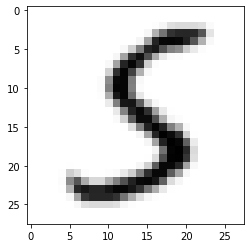

18 s


In [10]:
# select a random image to test prediction
label,character,index = showRandomImageFrom(images=trainer.test_images,labels=trainer.test_labels)

In [11]:
# check prediction for above selected image
char,pred = trainer.predict_one(inp=test_images[index],get_char=False)

In [12]:
pred,trainer.get_char_from_pred(pred)

(18, 's')

In [13]:
# summarise model
trainer.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Creating model folder
!mkdir model
# saving trained model to 'model' folder with name 'model.h5'
trainer.save_model(path='model/model.h5')

A subdirectory or file model already exists.


In [15]:
# creating a new trainer instance that will be used to test the saved trainer
# only need to pass the testing data here
saved_trainer = Trainer(x_train=[],y_train=[],x_test=test_images,y_test=test_labels)

In [16]:
# load the saved model in the saved_trainer instance
saved_trainer.load_model(path='model/model.h5')

W0222 21:35:30.723563 12712 hdf5_format.py:203] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [17]:
# evaluate model. should give same result as the evaluation of trained model
saved_trainer.evaluate()

(311.5280480949195, 0.8072115)

In [18]:
# predict the same character in cell 10
char,pred = saved_trainer.predict_one(inp=test_images[index],get_char=False)
pred,trainer.get_char_from_pred(pred)

(18, 's')